# Online Payments Fraud Detection with Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/sample_data/PS_20174392719_1491204439457_log.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
28287,8,CASH_OUT,188291.44,C785340361,0.0,0.0,C1937962514,802129.26,1581311.49,0.0,0.0
28288,8,CASH_OUT,110779.05,C1620622477,0.0,0.0,C372017580,3846641.65,4122268.38,0.0,0.0
28289,8,CASH_OUT,255477.34,C1694636429,0.0,0.0,C997608398,798443.99,1291418.68,0.0,0.0
28290,8,CASH_OUT,181730.24,C1782685535,0.0,0.0,C405881980,2896779.55,3078509.79,0.0,0.0
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.0,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.0,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.0,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.0,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.0,C1034382650,142758.39,281410.24,0.0,0.0
28296,8,CASH_OUT,61553.92,C1612091270,0.0,0.0,C8733802,242151.60,30370.00,NaN,NaN


In [ ]:
data.shape

(28297, 11)

In [ ]:
print(data.type.value_counts())

type
PAYMENT     13913
CASH_OUT     6109
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: count, dtype: int64


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


<Axes: xlabel='type', ylabel='count'>

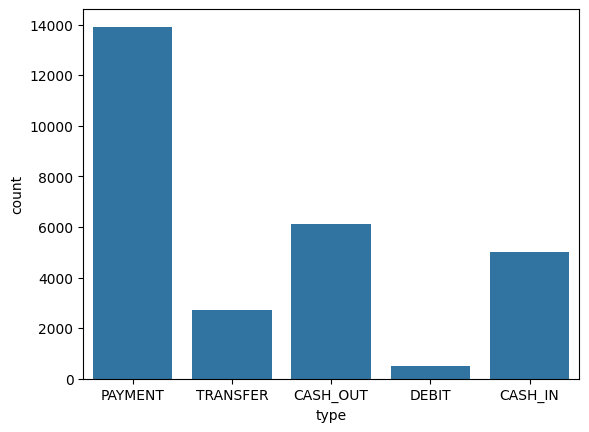

In [ ]:
sns.countplot(data, x='type')

<Axes: xlabel='type', ylabel='count'>

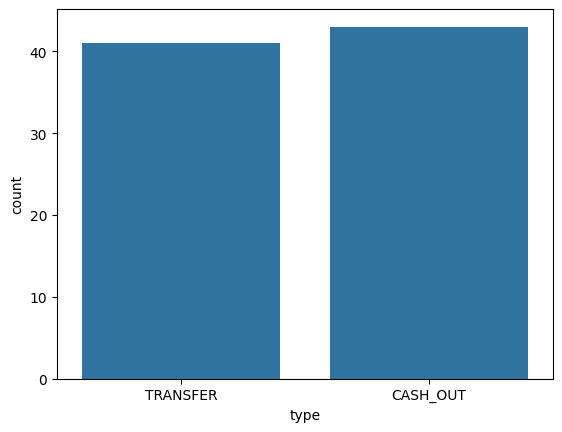

In [ ]:
sns.countplot(data[data['isFraud']==1], x='type')

Text(0.5, 0, 'amount')

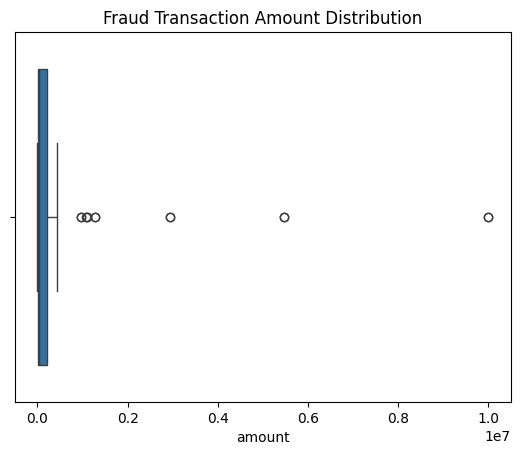

In [ ]:
sns.boxplot(data[data['isFraud']==1]["amount"].values, orient='h')
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('amount')

<Axes: xlabel='hour', ylabel='count'>

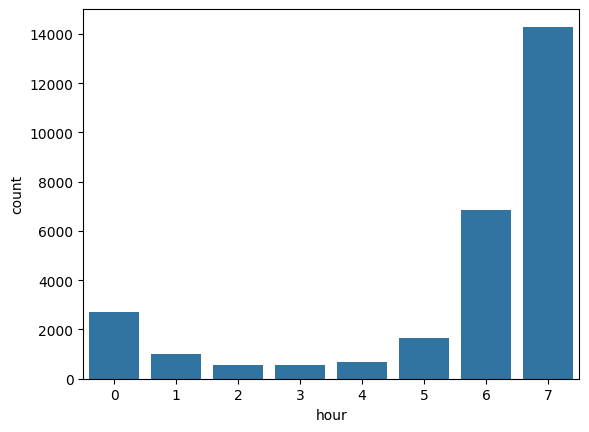

In [ ]:
data['hour'] = (data['step'] - 1) % 24
sns.countplot(data, x='hour')

In [ ]:
# Dropping columns that are not needed
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
# Applying encoding on type column
df_enc = pd.get_dummies(data, columns = ['type'])
df_enc

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.00,0.00,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.00,0.00,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.00,0.00,1.0,0,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.00,0.00,1.0,0,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.00,0.00,0.0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28292,8,7270.37,0.0,0.00,1523685.68,1530956.05,0.0,7,False,True,False,False,False
28293,8,113043.31,0.0,0.00,10085462.79,10014348.15,0.0,7,False,True,False,False,False
28294,8,89346.62,0.0,0.00,112673.41,202020.02,0.0,7,False,True,False,False,False
28295,8,138651.85,0.0,0.00,142758.39,281410.24,0.0,7,False,True,False,False,False


In [ ]:
X = df_enc.drop('isFraud', axis = 1)
y = df_enc['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [27]:
# Check the columns of your DataFrame
print(data.columns)

# If the columns exist, drop them
if all(col in data.columns for col in ['nameOrig', 'nameDest', 'isFlaggedFraud']):
    data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
else:
    print("Some columns are missing in the DataFrame.")

# Continue with the encoding and model fitting
df_enc = pd.get_dummies(data, columns=['type'])
X = df_enc.drop('isFraud', axis=1)
y = df_enc['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print('LogisticRegression')
print(classification_report(y_test, y_lr_pred))


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'hour'],
      dtype='object')
Some columns are missing in the DataFrame.
LogisticRegression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5642
         1.0       0.50      0.11      0.18        18

    accuracy                           1.00      5660
   macro avg       0.75      0.56      0.59      5660
weighted avg       1.00      1.00      1.00      5660



In [28]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming 'data' is your DataFrame

# Check the columns of your DataFrame
print("Columns in the DataFrame:", data.columns)

# If the columns exist, drop them
if all(col in data.columns for col in ['nameOrig', 'nameDest', 'isFlaggedFraud']):
    data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
else:
    print("Some columns are missing in the DataFrame.")

# Applying encoding on 'type' column
df_enc = pd.get_dummies(data, columns=['type'])

# Splitting the data into features and target
X = df_enc.drop('isFraud', axis=1)
y = df_enc['isFraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier')
print(classification_report(y_test, y_dt_pred))

Columns in the DataFrame: Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'hour'],
      dtype='object')
Some columns are missing in the DataFrame.
DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5642
         1.0       0.73      0.61      0.67        18

    accuracy                           1.00      5660
   macro avg       0.87      0.81      0.83      5660
weighted avg       1.00      1.00      1.00      5660



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'data' is your DataFrame

# Check the columns of your DataFrame
print("Columns in the DataFrame:", data.columns)

# If the columns exist, drop them
if all(col in data.columns for col in ['nameOrig', 'nameDest', 'isFlaggedFraud']):
    data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
else:
    print("Some columns are missing in the DataFrame.")

# Applying encoding on 'type' column
df_enc = pd.get_dummies(data, columns=['type'])

# Splitting the data into features and target
X = df_enc.drop('isFraud', axis=1)
y = df_enc['isFraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print('RandomForestClassifier')
print(classification_report(y_test, y_rf_pred))


Columns in the DataFrame: Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'hour'],
      dtype='object')
Some columns are missing in the DataFrame.
RandomForestClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5642
         1.0       1.00      0.50      0.67        18

    accuracy                           1.00      5660
   macro avg       1.00      0.75      0.83      5660
weighted avg       1.00      1.00      1.00      5660



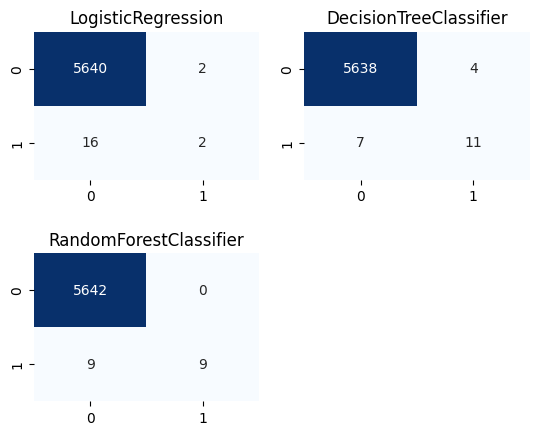

In [30]:
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')
plt.subplots_adjust(hspace=0.5)